## Setup Environment

In [1]:
import pandas as pd
import geopandas as gpd 
import numpy as np

import matplotlib.pyplot as plt
from shapely.geometry import Point

import altair as alt

In [2]:
crash_df = pd.read_csv('traffic_crashes.csv')
crash_df

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,019d84ab0f03ace0b07075b0a7d83ba867b7dadad30410...,Y,03/29/2025 06:10:00 PM,35,STOP SIGN/FLASHER,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,1.0,4.0,0.0,18,7,3,41.793739,-87.697311,POINT (-87.697311324011 41.793738897511)
1,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,01/15/2025 01:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,0.0,1.0,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493)
2,00c996c2b04c2d3b5a5fc96d35b2b538e2c0f34703b885...,NaN,07/15/2023 11:00:00 PM,15,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO SIDE,PARKING LOT,...,0.0,2.0,2.0,0.0,23,7,7,41.758974,-87.577299,POINT (-87.577299189217 41.758973539258)
3,027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...,NaN,05/31/2020 01:13:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,0.0,4.0,0.0,1,1,5,41.878326,-87.701280,POINT (-87.701279794376 41.878326229569)
4,03a3b86d3b62c8948e25623db7ccf326fed99eaa297b59...,NaN,03/15/2025 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,0,7,3,41.836784,-87.723610,POINT (-87.723610276569 41.836784034697)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932078,5f3265aec2ae9cb1e601fe0a0b4af11191b55d8786a26c...,NaN,01/28/2025 03:50:00 PM,40,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,15,3,1,41.903788,-87.624720,POINT (-87.624720160474 41.903788026488)
932079,00580c38c361fe6da401a2a6b96f381a08f3a6811f18c7...,NaN,01/29/2025 07:25:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,PARKING LOT,...,0.0,0.0,2.0,0.0,19,4,1,41.988314,-87.791671,POINT (-87.791671453941 41.988313831775)
932080,4f4333f00f578df2ffc68daa7a1177143340d8d899b83c...,NaN,01/29/2025 09:27:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,2.0,0.0,9,4,1,41.852500,-87.666172,POINT (-87.666172373715 41.852500328787)
932081,5ac09423aa9016c9755f1cace10a067fcab2648f18577c...,NaN,01/29/2025 07:08:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,FOUR WAY,...,1.0,0.0,1.0,0.0,19,4,1,41.885802,-87.624660,POINT (-87.624659771063 41.885801546318)


In [3]:
crash_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [4]:
crash_df['FIRST_CRASH_TYPE'].unique()

array(['ANGLE', 'FIXED OBJECT', 'REAR TO SIDE', 'TURNING',
       'PARKED MOTOR VEHICLE', 'PEDALCYCLIST', 'REAR TO FRONT',
       'SIDESWIPE OPPOSITE DIRECTION', 'REAR END',
       'SIDESWIPE SAME DIRECTION', 'HEAD ON', 'OTHER NONCOLLISION',
       'OTHER OBJECT', 'PEDESTRIAN', 'REAR TO REAR', 'ANIMAL',
       'OVERTURNED', 'TRAIN'], dtype=object)

In [5]:
# ~ 40,000 accidents that were pedestrian related incidents
crash_df[(crash_df['FIRST_CRASH_TYPE'] == 'PEDESTRIAN') | (crash_df['FIRST_CRASH_TYPE'] == 'PEDALCYCLIST')]

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
6,088061d9b7e5ab5b1353517ebefcadca065c20de8ca860...,N,03/15/2025 02:12:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PEDALCYCLIST,FOUR WAY,...,0.0,0.0,2.0,0.0,14,7,3,41.871778,-87.625789,POINT (-87.625789124419 41.871778332743)
53,2f3c202a917ab73f0de69b2f2bb0e95807e0afd7db8704...,NaN,03/15/2025 02:15:00 PM,30,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDALCYCLIST,UNKNOWN,...,0.0,0.0,2.0,0.0,14,7,3,41.880565,-87.649361,POINT (-87.649361418191 41.880565045499)
65,57feb475a9f4253d7cb02b1168dbdb9aed4895e29faf0c...,NaN,11/04/2024 02:46:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,ONE-WAY,...,1.0,0.0,1.0,0.0,14,2,11,41.891621,-87.624254,POINT (-87.624253929022 41.891621161011)
116,542a4b3001422e80e685d2486fa17924bb374f380dc45e...,NaN,03/15/2025 11:51:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,11,7,3,41.917698,-87.682372,POINT (-87.682371991359 41.917698146237)
135,441a53d130fc1d01d7aaab8a0762e522464b9e421ec9d2...,NaN,09/22/2023 03:38:00 PM,5,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDESTRIAN,PARKING LOT,...,0.0,0.0,1.0,0.0,15,6,9,41.864521,-87.639304,POINT (-87.639304099636 41.864521193744)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932008,72ce94a1c39141121ba1b799c2fc655694773391eeb766...,NaN,01/28/2025 01:35:00 PM,30,OTHER,OTHER,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN BARRIER,...,0.0,1.0,1.0,0.0,13,3,1,41.891897,-87.624016,POINT (-87.624016288559 41.891897075755)
932014,2e59a36414fd947d3dcac33c033a2183894be6da55c82b...,NaN,01/29/2025 05:22:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,PEDALCYCLIST,FOUR WAY,...,1.0,0.0,2.0,0.0,17,4,1,41.917093,-87.736183,POINT (-87.736182525417 41.917093452467)
932025,01b0412906ca761e4e6c2c6fba14f22894aa37308b4ef0...,NaN,01/29/2025 07:20:00 AM,30,YIELD,NOT FUNCTIONING,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,...,0.0,0.0,2.0,0.0,7,4,1,41.883297,-87.624256,POINT (-87.624255795047 41.883296623179)
932060,201544dad2b16875414f02c101f44730154bd91ce3969e...,NaN,05/03/2023 09:10:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDALCYCLIST,DIVIDED - W/MEDIAN (NOT RAISED),...,1.0,0.0,1.0,0.0,21,4,5,NaN,NaN,NaN


In [6]:
# Create the dataset into geo dataframe using latitude and longitude columns
geometry = [Point(xy) for xy in zip(crash_df['LONGITUDE'], crash_df['LATITUDE'])]
crash_gdf = gpd.GeoDataFrame(crash_df, geometry=geometry, crs=4326)
crash_gdf

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,geometry
0,019d84ab0f03ace0b07075b0a7d83ba867b7dadad30410...,Y,03/29/2025 06:10:00 PM,35,STOP SIGN/FLASHER,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,NOT DIVIDED,...,1.0,4.0,0.0,18,7,3,41.793739,-87.697311,POINT (-87.697311324011 41.793738897511),POINT (-87.69731 41.79374)
1,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,01/15/2025 01:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,1.0,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493),POINT (-87.65674 41.81607)
2,00c996c2b04c2d3b5a5fc96d35b2b538e2c0f34703b885...,NaN,07/15/2023 11:00:00 PM,15,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO SIDE,PARKING LOT,...,2.0,2.0,0.0,23,7,7,41.758974,-87.577299,POINT (-87.577299189217 41.758973539258),POINT (-87.5773 41.75897)
3,027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...,NaN,05/31/2020 01:13:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,4.0,0.0,1,1,5,41.878326,-87.701280,POINT (-87.701279794376 41.878326229569),POINT (-87.70128 41.87833)
4,03a3b86d3b62c8948e25623db7ccf326fed99eaa297b59...,NaN,03/15/2025 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,1.0,0.0,0,7,3,41.836784,-87.723610,POINT (-87.723610276569 41.836784034697),POINT (-87.72361 41.83678)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932078,5f3265aec2ae9cb1e601fe0a0b4af11191b55d8786a26c...,NaN,01/28/2025 03:50:00 PM,40,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,...,0.0,2.0,0.0,15,3,1,41.903788,-87.624720,POINT (-87.624720160474 41.903788026488),POINT (-87.62472 41.90379)
932079,00580c38c361fe6da401a2a6b96f381a08f3a6811f18c7...,NaN,01/29/2025 07:25:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,PARKING LOT,...,0.0,2.0,0.0,19,4,1,41.988314,-87.791671,POINT (-87.791671453941 41.988313831775),POINT (-87.79167 41.98831)
932080,4f4333f00f578df2ffc68daa7a1177143340d8d899b83c...,NaN,01/29/2025 09:27:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,2.0,0.0,9,4,1,41.852500,-87.666172,POINT (-87.666172373715 41.852500328787),POINT (-87.66617 41.8525)
932081,5ac09423aa9016c9755f1cace10a067fcab2648f18577c...,NaN,01/29/2025 07:08:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,FOUR WAY,...,0.0,1.0,0.0,19,4,1,41.885802,-87.624660,POINT (-87.624659771063 41.885801546318),POINT (-87.62466 41.8858)


In [7]:
# filter the geo df to only use pedestrian related incidents
crash_gdf = crash_gdf[(crash_gdf['FIRST_CRASH_TYPE'] == 'PEDESTRIAN') | (crash_gdf['FIRST_CRASH_TYPE'] == 'PEDALCYCLIST')]
crash_gdf

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,geometry
6,088061d9b7e5ab5b1353517ebefcadca065c20de8ca860...,N,03/15/2025 02:12:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PEDALCYCLIST,FOUR WAY,...,0.0,2.0,0.0,14,7,3,41.871778,-87.625789,POINT (-87.625789124419 41.871778332743),POINT (-87.62579 41.87178)
53,2f3c202a917ab73f0de69b2f2bb0e95807e0afd7db8704...,NaN,03/15/2025 02:15:00 PM,30,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDALCYCLIST,UNKNOWN,...,0.0,2.0,0.0,14,7,3,41.880565,-87.649361,POINT (-87.649361418191 41.880565045499),POINT (-87.64936 41.88057)
65,57feb475a9f4253d7cb02b1168dbdb9aed4895e29faf0c...,NaN,11/04/2024 02:46:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,ONE-WAY,...,0.0,1.0,0.0,14,2,11,41.891621,-87.624254,POINT (-87.624253929022 41.891621161011),POINT (-87.62425 41.89162)
116,542a4b3001422e80e685d2486fa17924bb374f380dc45e...,NaN,03/15/2025 11:51:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,0.0,1.0,0.0,11,7,3,41.917698,-87.682372,POINT (-87.682371991359 41.917698146237),POINT (-87.68237 41.9177)
135,441a53d130fc1d01d7aaab8a0762e522464b9e421ec9d2...,NaN,09/22/2023 03:38:00 PM,5,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDESTRIAN,PARKING LOT,...,0.0,1.0,0.0,15,6,9,41.864521,-87.639304,POINT (-87.639304099636 41.864521193744),POINT (-87.6393 41.86452)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932008,72ce94a1c39141121ba1b799c2fc655694773391eeb766...,NaN,01/28/2025 01:35:00 PM,30,OTHER,OTHER,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN BARRIER,...,1.0,1.0,0.0,13,3,1,41.891897,-87.624016,POINT (-87.624016288559 41.891897075755),POINT (-87.62402 41.8919)
932014,2e59a36414fd947d3dcac33c033a2183894be6da55c82b...,NaN,01/29/2025 05:22:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,PEDALCYCLIST,FOUR WAY,...,0.0,2.0,0.0,17,4,1,41.917093,-87.736183,POINT (-87.736182525417 41.917093452467),POINT (-87.73618 41.91709)
932025,01b0412906ca761e4e6c2c6fba14f22894aa37308b4ef0...,NaN,01/29/2025 07:20:00 AM,30,YIELD,NOT FUNCTIONING,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,...,0.0,2.0,0.0,7,4,1,41.883297,-87.624256,POINT (-87.624255795047 41.883296623179),POINT (-87.62426 41.8833)
932060,201544dad2b16875414f02c101f44730154bd91ce3969e...,NaN,05/03/2023 09:10:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDALCYCLIST,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,1.0,0.0,21,4,5,NaN,NaN,NaN,POINT EMPTY


In [8]:
# Read and display the chicago neighborhood geojson file
chicago_gdf = gpd.read_file('chicago.geojson')
chicago_gdf

,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.785 41.90915, -87.78531 41..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."
...,...,...,...,...,...
56,57,155285532.005,53406.9156168,60623,"MULTIPOLYGON (((-87.69479 41.83008, -87.69486 ..."
57,58,211114779.439,58701.3253749,60629,"MULTIPOLYGON (((-87.68306 41.75786, -87.68306 ..."
58,59,211696050.967,58466.1602979,60620,"MULTIPOLYGON (((-87.62373 41.72167, -87.62388 ..."
59,60,125424284.172,52377.8545408,60637,"MULTIPOLYGON (((-87.57691 41.79511, -87.577 41..."


In [9]:
# Joining the crashes dataset with the chicago neighborhood geojson file
chi_crashes_gdf = gpd.sjoin(crash_gdf, chicago_gdf, predicate='within')

Text(0.5, 1.0, 'Pedestrian Related Accidents in Chicago')

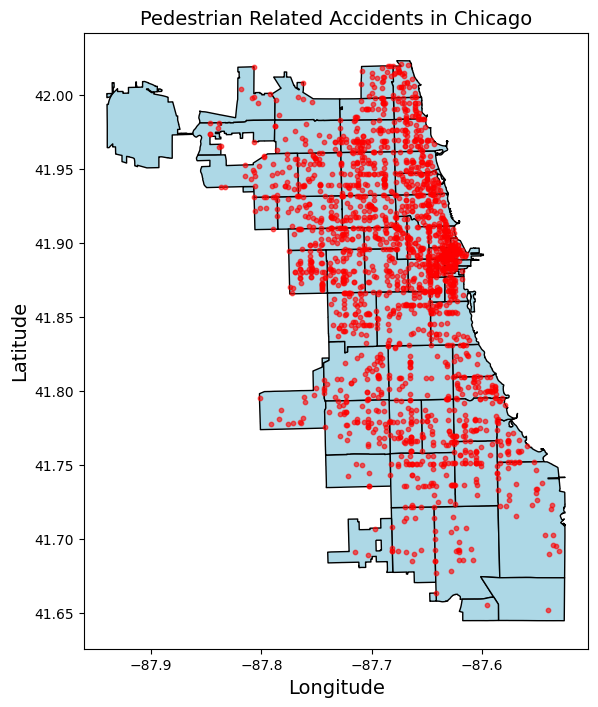

In [26]:
# Dot Desnity Map of Pedestrian Related Accidents in Chicago

# ############## ALTAIR VERSION
# # Create an Altair scatter plot
# dot_map = alt.Chart(chi_crashes_gdf.sample(5000)).mark_circle().encode(
#     x=alt.Y('LONGITUDE',scale=alt.Scale(domain=[-88.0, -87.5])),
#     y=alt.Y('LATITUDE',scale=alt.Scale(domain=[41.6, 42.1])),
#     tooltip=['FIRST_CRASH_TYPE', 'CRASH_TYPE', 'zip'],
# ).properties(
#     title="Pedestrian Related Accidents in Chicago",
#     width=500,
#     height=600
# ).interactive()  # Enables zooming & panning
# dot_map
# ############## ALTAIR VERSION

fig, ax = plt.subplots(figsize=(12, 8))
# Plot the Chicago neighborhoods
chicago_gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the green roof location onto the map
chi_crashes_gdf.sample(2000).plot(ax=ax, color='red', alpha=0.6, markersize=10)

# Add labels and title
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_title("Pedestrian Related Accidents in Chicago", fontsize=14)

<Axes: title={'center': 'Pedestrian Related Accidents per Neighborhood'}, xlabel='Longitude', ylabel='Latitude'>

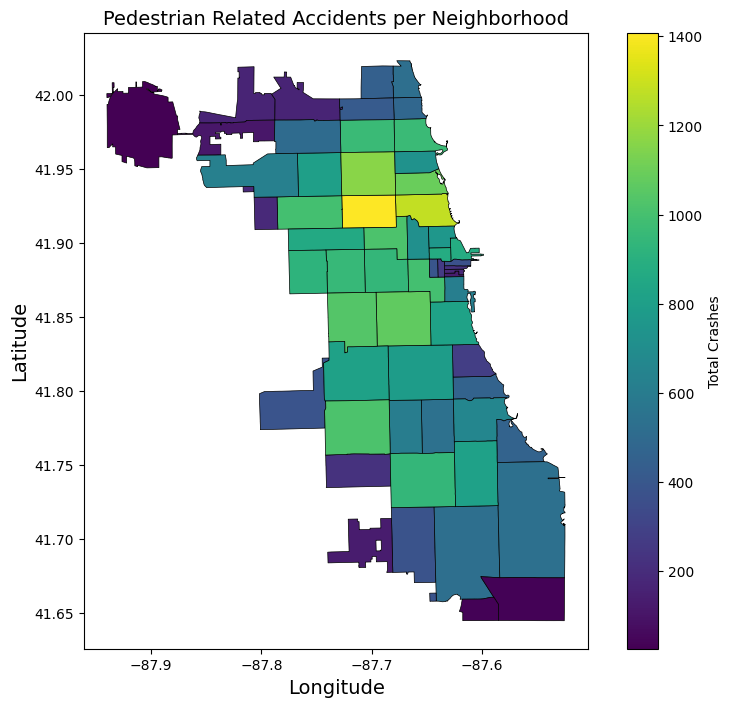

In [15]:
# Chloropeth Map of Pedestrian Related Accidents Per Neighborhood in Chicago

# Create a new dataframe with the pedestrian accidents per neighborhood and 
# merge it with the chicago neighborhood geojson file
total_crashes_df = chi_crashes_gdf
total_crashes_df = total_crashes_df.groupby('zip').size().reset_index(name='count')

other_chi = chicago_gdf
merged = other_chi.merge(total_crashes_df, on='zip')

################## ALTAIR VERSION
# # Create an Altair map
# neighborhood_crashes_map = alt.Chart(merged).mark_geoshape(stroke='white').encode(
#     color=alt.Color('count', title='Total Crashes', scale=alt.Scale(scheme='viridis')),
#     tooltip=['count', 'zip']
# ).project(
#     type='mercator'
# ).properties(
#     title="Pedestrian Related Accidents per Neighborhood",
#     width=900,
#     height=600
# )
################## ALTAIR VERSION

# plot chloropeth map of crash totals in each neighborhood
neighborhood_crashes_map = merged.plot('count', cmap='viridis', legend=True,
                 legend_kwds={'label': "Total Crashes",
    'orientation': "vertical"}, figsize=(10, 8), edgecolor='black', linewidth=0.5)
neighborhood_crashes_map.set_xlabel('Longitude', fontsize=14)
neighborhood_crashes_map.set_ylabel('Latitude', fontsize=14)
neighborhood_crashes_map.set_title("Pedestrian Related Accidents per Neighborhood", fontsize=14)
neighborhood_crashes_map

# ML Analysis

## First Analysis: Identify Hotspots for Pedestrian Related Accidents

### In this analysis, we want to identify the areas in the city with the most pedestrian related incidents so we can focus our plans on improving walkability and pedestrian safety in the areas that are in the most need of help. To do this, we will perform clustering techniques to identify these hotspots. Idealy, we can perform clustering techniques on a highly granular level so that we can pinpoint the streets / intersections that have many incidents so we can add traffic safety measures to these streets / intersections, potentially utilizing speed cameras, stop lights, speed bumps, etc (the best type of safety measure to use is another thing we are trying to find out in this project!). 

#### We first want to find the neighborhoods in most need of help so that we can perform clustering specifically on these neighborhoods to find the streets / intersections that are most dangerous for walkers. 

In [39]:
# filter out the top 10 zip codes from the joined dataframe on 'zip' by number of pedestrian crashes
top5_most_crashes = chi_crashes_gdf.groupby('zip').size().sort_values(ascending=False).head(5)
top5_most_crashes

zip
60647    1408
60614    1282
60618    1163
60657    1092
60608    1069
dtype: int64

In [160]:
# from sklearn.cluster import KMeans

In [161]:
# from sklearn.cluster import KMeans

# def cluster_zip_crashes(df, zip_code, n_clusters=5):
#     # Filter to the target ZIP code
#     neighborhood_df = df[df['zip'] == zip_code].copy()
#     coordinates = neighborhood_df[['LATITUDE', 'LONGITUDE']].copy()

#     # Running k-means++ with the passed in number of clusters
#     kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
#     coordinates['cluster'] = kmeans.fit_predict(coordinates)

#     # Plotting the cluster centers found
#     plt.figure(figsize=(8, 8))
#     plt.scatter(coordinates['LONGITUDE'], coordinates['LATITUDE'], c=coordinates['cluster'], cmap='tab10', s=15)
#     centers = kmeans.cluster_centers_
#     plt.scatter(centers[:, 1], centers[:, 0], c='red', s=100, marker='X', label='Cluster Centers')
#     plt.title(f"K-Means++ Pedestrian Crash Clusters in ZIP {zip_code}")
#     plt.xlabel("Longitude")
#     plt.ylabel("Latitude")
#     plt.legend()
#     plt.grid(True)
#     plt.show()


In [159]:
# pedestrian_crash_df = chi_crashes_gdf
# # # Run clustering on ZIP 60647 to see the cluster centers from k-means++
# clustered = cluster_zip_crashes(pedestrian_crash_df, zip_code='60647', n_clusters=20)

In [ ]:
from sklearn.cluster import DBSCAN

# Function to allow us to run the DBSCAN analysis on a specific neighborhood. For this function,
# along with the zip code of the neighborhood to analyze, we pass in the parameters eps_meters and
# min_samples. ers_meters represents how far, in meters, a point can be from another point in the
# same cluster, so this allows us to control how far away we allow a cluster to include an accident
# as part of its group. min_samples represents the minimum number of accidents needed for a cluster
# to be recognized and not considered noise / irrelevant. 
def neighborhood_dbscan(df, zip_code, eps_meters=75, min_samples=5):
    # Filter df to only look at specified zip code
    neighborhood_df = df[df['zip'] == zip_code].copy()
    coords = neighborhood_df[['LATITUDE', 'LONGITUDE']]

    # Convert lat/long to radians for haversine distance metric in DBSCAN call below
    coords_rad = np.radians(coords)

    # Roughly convert eps_meters to radians
    eps_rad = eps_meters / 6371000.0

    # Run DBSCAN with haversine metric
    db = DBSCAN(eps=eps_rad, min_samples=min_samples, metric='haversine')
    labels = db.fit_predict(coords_rad)
    neighborhood_df['cluster'] = labels

    # Split data into clustered and noise sets to enhance the readability of the plot
    clustered = neighborhood_df[neighborhood_df['cluster'] != -1]
    noise = neighborhood_df[neighborhood_df['cluster'] == -1]

    # Plot the clusters found using DBSCAN
    plt.figure(figsize=(10, 10))
    
    # Points belonging to a cluster are plotted in color and large so users can quickly see them
    plt.scatter(clustered['LONGITUDE'], clustered['LATITUDE'], 
                c=clustered['cluster'], cmap='tab10', s=40, label='Clustered Points')
    
    # Points that do not belong to any cluster and are noise are plotted in gray and small to obscure them
    plt.scatter(noise['LONGITUDE'], noise['LATITUDE'], 
                color='gray', alpha=0.3, s=10, label='Noisy Points)')

    # Create and plot cluster centers to mark potential areas to add traffic measures for each cluster
    cluster_centers = clustered.groupby('cluster')[['LATITUDE', 'LONGITUDE']].mean()
    plt.scatter(cluster_centers['LONGITUDE'], cluster_centers['LATITUDE'],
                c='black', marker='X', s=100, label='Cluster Center')

    plt.title(f"DBSCAN Pedestrian Crash Clusters in ZIP {zip_code}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

#### Using the 5 neighborhoods with the most crashes, we now perform DBSCAN using the above function in each of these neighborhoods to find the hotspots in each one so we know where to add safety measures to. The top 5 neighborhoods in order are: 
#### 60647, 60614, 60618, 60657, 60608

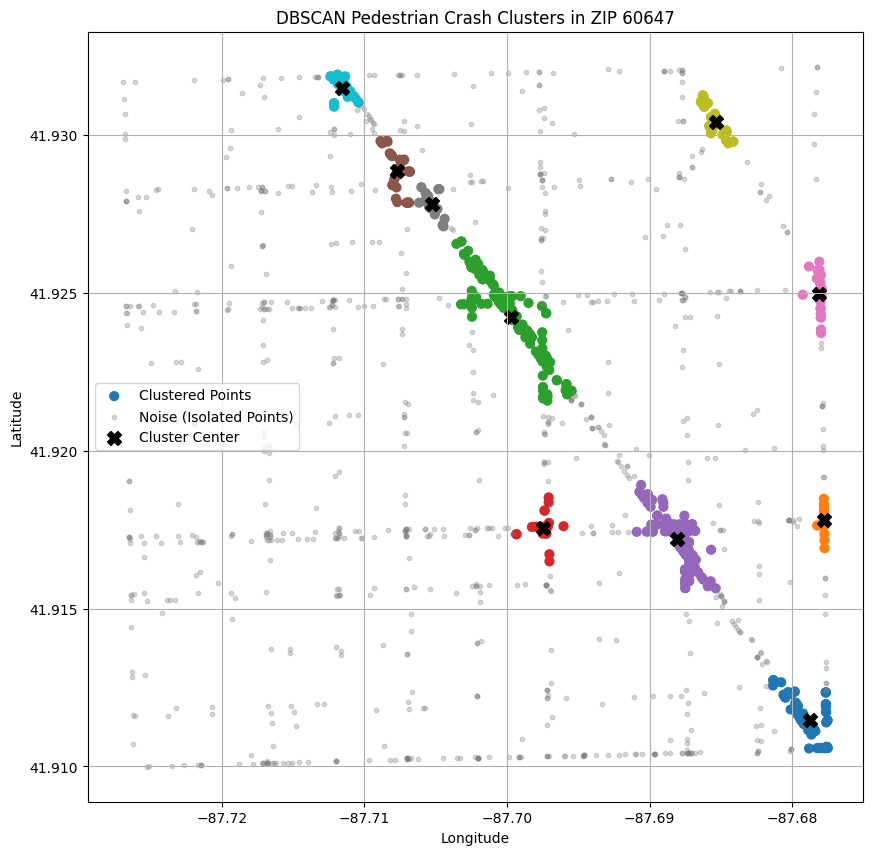

In [146]:
pedestrian_crash_df = chi_crashes_gdf
# Run clustering on ZIP 60647 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60647', eps_meters=100, min_samples=20)

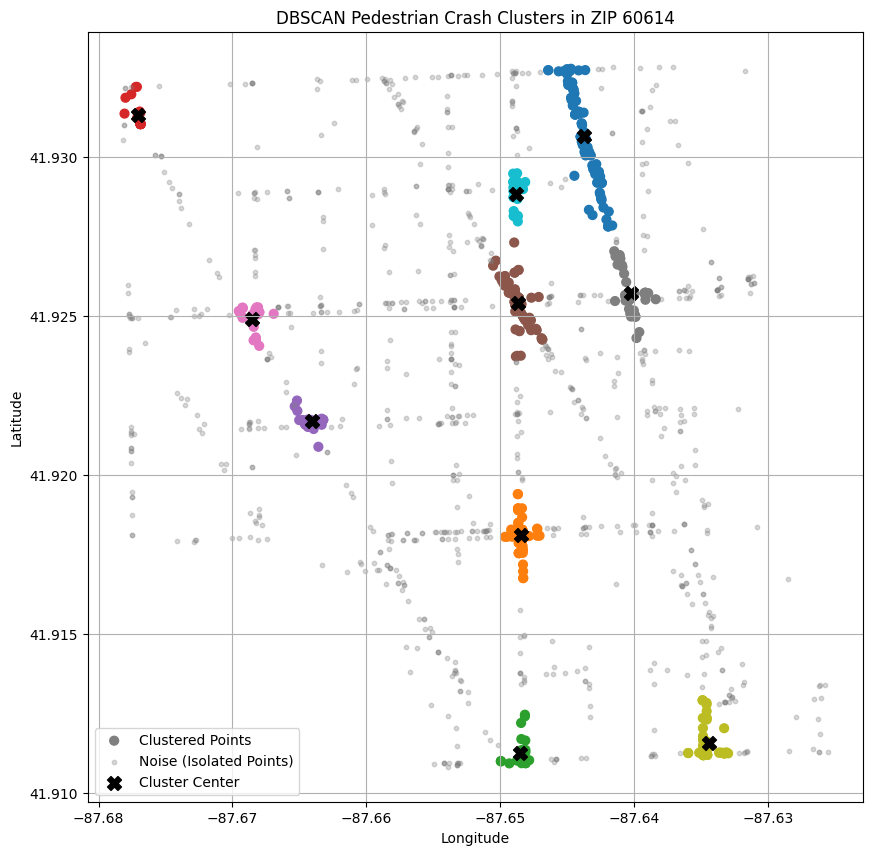

In [ ]:
# Run clustering on ZIP 60614 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60614', eps_meters=100, min_samples=20)

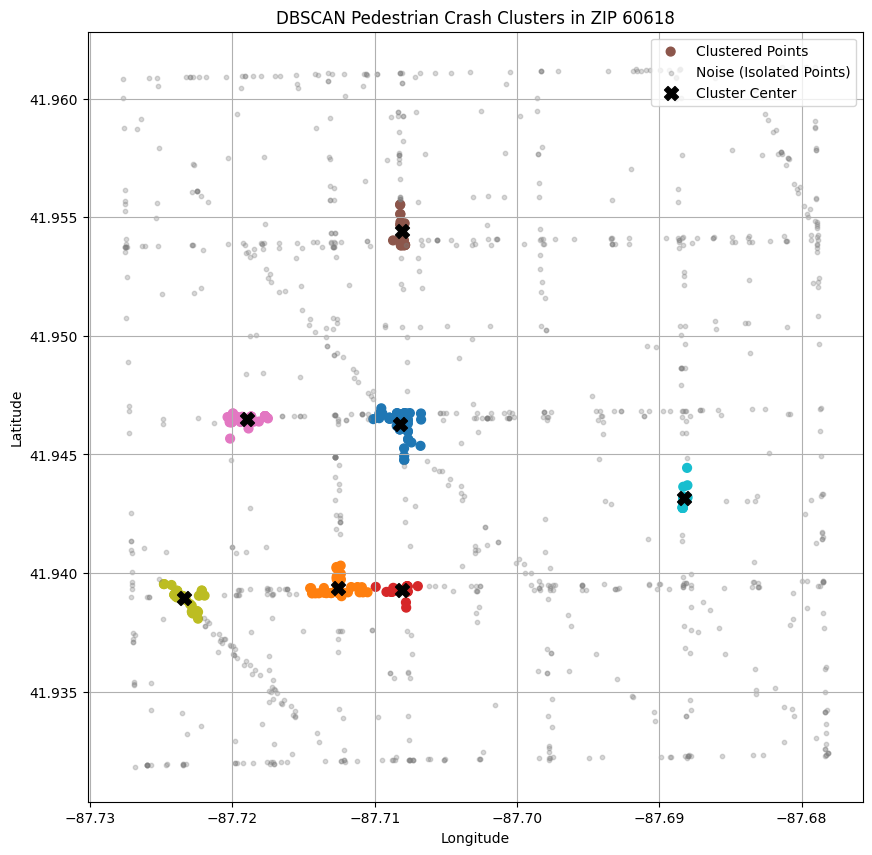

In [ ]:
# Run clustering on ZIP 60618 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60618', eps_meters=100, min_samples=20)

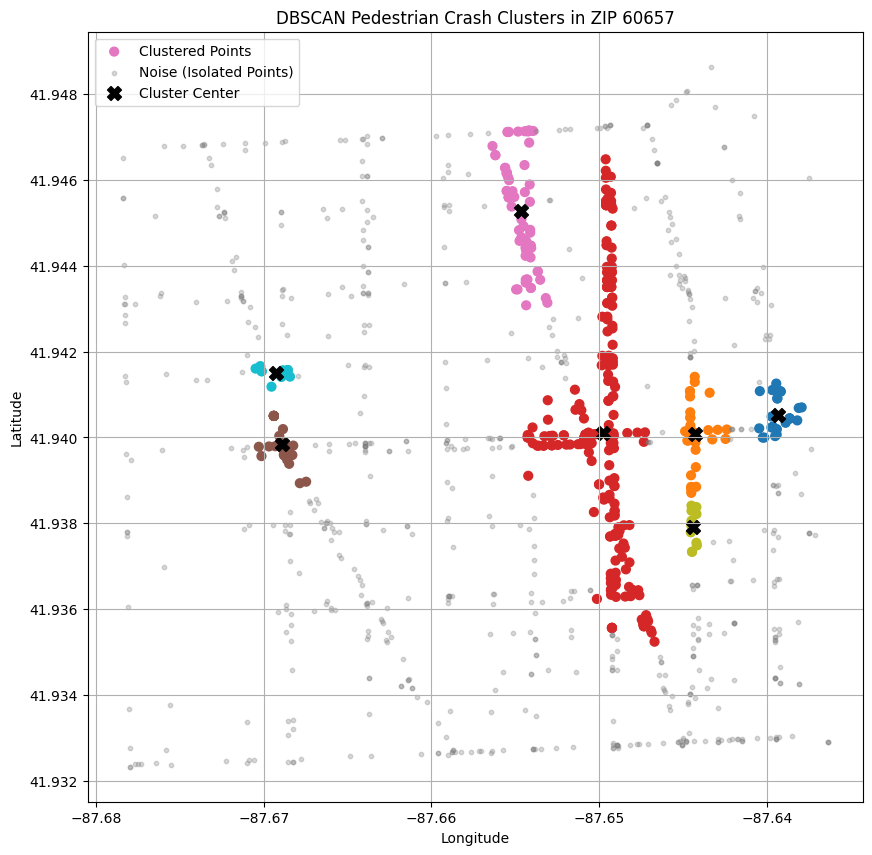

In [ ]:
# Run clustering on ZIP 60657 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60657', eps_meters=100, min_samples=20)

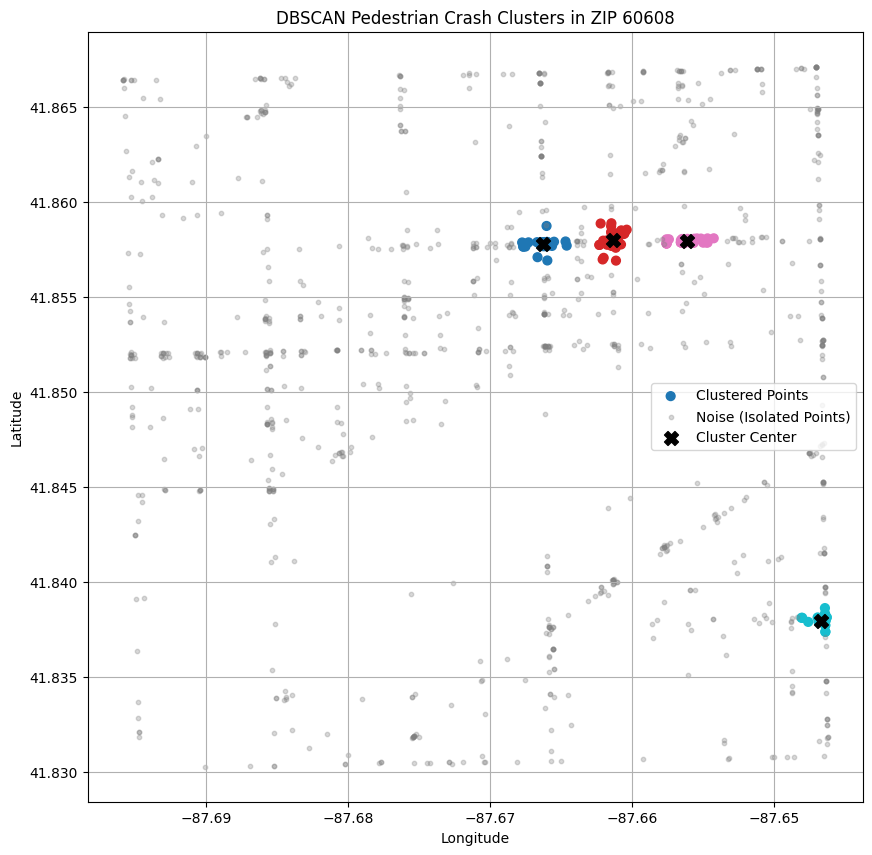

In [ ]:
# Run clustering on ZIP 60608 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60608', eps_meters=100, min_samples=20)